# Analysis on One-shot Classification with Matteo/Luis Dataset

Autor: Giovanni Foletto
date: July 18, 2024

## Content

In this analysis, I will try to recreate the analysis on the single shot classification problem I already seen. 
The goal is to understand if this approach has a possible application in this fields and allow reliable and secure solution to the problem of log classification.


In [1]:
import polars as pl
import json
import matplotlib.pyplot as plt
import seaborn as sns

/home/rising/thesis-da/lib/python3.10/site-packages/polars/_cpu_check.py:232: RuntimeWarning: Missing required CPU features.

The following required CPU features were not detected:
    ssse3, sse4.1, sse4.2, popcnt
Continuing to use this version of Polars on this processor will likely result in a crash.
Install the `polars-lts-cpu` package instead of `polars` to run Polars with better compatibility.

Hint: If you are on an Apple ARM machine (e.g. M1) this is likely due to running Python under Rosetta.
It is recommended to install a native version of Python that does not run under Rosetta x86-64 emulation.

If you believe this warning to be a false positive, you can set the `POLARS_SKIP_CPU_CHECK` environment variable to bypass this check.

  warnings.warn(


In [6]:
data = []

with open("../data/prepared/zero_shot_classification/result_3_random_luis_matteo.txt", "r") as of:
	lines = of.readlines()
	for line in lines:
		oj = json.loads(line)

		#print(oj.keys()) # dict_keys(['sequence', 'labels', 'scores'])
		oj["sequence"] = oj["sequence"] # json.loads(oj["sequence"]) 
		oj["undecided"] = oj["scores"][oj["labels"].index("undecided")] # ["undecided", "malicious", "benign"]
		oj["malicious"] = oj["scores"][oj["labels"].index("malicious")]
		oj["benign"] = oj["scores"][oj["labels"].index("benign")]

		oj["max_value"] = max(oj["scores"])
		oj["output"] = oj["labels"][oj["scores"].index(oj["max_value"])]
		
		data.append(oj)

len(data)

13359

In [7]:
data[0]

{'sequence': '{"kind":"Event","apiVersion":"audit.k8s.io/v1","level":"RequestResponse","auditID":"6f414bca-08fa-423a-929a-55d22b83b7e1","stage":"ResponseComplete","requestURI":"/apis/coordination.k8s.io/v1/namespaces/kube-system/leases/kube-scheduler?timeout=5s","verb":"get","user":{"username":"system:kube-scheduler","groups":["system:authenticated"]},"sourceIPs":["192.168.38.9"],"userAgent":"kube-scheduler/v1.28.7 (linux/amd64) kubernetes/c8dcb00/leader-election","objectRef":{"resource":"leases","namespace":"kube-system","name":"kube-scheduler","apiGroup":"coordination.k8s.io","apiVersion":"v1"},"responseStatus":{"metadata":{},"code":200},"responseObject":{"kind":"Lease","apiVersion":"coordination.k8s.io/v1","metadata":{"name":"kube-scheduler","namespace":"kube-system","uid":"76cad05e-fbec-4503-88ab-21e9ec9d38fa","resourceVersion":"5336615","creationTimestamp":"2024-02-19T08:50:48Z","managedFields":[{"manager":"kube-scheduler","operation":"Update","apiVersion":"coordination.k8s.io/v1"

In [8]:
df = pl.DataFrame(data)
df.head(2)

sequence,labels,scores,undecided,malicious,benign,max_value,output
str,list[str],list[f64],f64,f64,f64,f64,str
"""{""kind"":""Event…","[""undecided"", ""benign"", ""malicious""]","[0.802082, 0.104591, 0.093327]",0.802082,0.093327,0.104591,0.802082,"""undecided"""
"""{""kind"":""Event…","[""undecided"", ""benign"", ""malicious""]","[0.794596, 0.107881, 0.097523]",0.794596,0.097523,0.107881,0.794596,"""undecided"""


In [9]:
df.describe()

statistic,sequence,labels,scores,undecided,malicious,benign,max_value,output
str,str,f64,f64,f64,f64,f64,f64,str
"""count""","""13359""",13359.0,13359.0,13359.0,13359.0,13359.0,13359.0,"""13359"""
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""",null,null,null,0.648183,0.168405,0.183412,0.652251,null
"""std""",null,null,null,0.221257,0.113243,0.114139,0.215597,null
"""min""","""{""kind"":""Event…",null,null,0.18652,0.012676,0.013328,0.33413,"""benign"""
"""25%""",null,null,null,0.41091,0.067941,0.07949,0.413974,null
"""50%""",null,null,null,0.80358,0.090101,0.109401,0.80358,null
"""75%""",null,null,null,0.853258,0.282865,0.307735,0.853258,null
"""max""","""{""kind"":""Event…",null,null,0.973996,0.438524,0.639591,0.973996,"""undecided"""


In [10]:
df.schema

OrderedDict([('sequence', String),
             ('labels', List(String)),
             ('scores', List(Float64)),
             ('undecided', Float64),
             ('malicious', Float64),
             ('benign', Float64),
             ('max_value', Float64),
             ('output', String)])

<Axes: ylabel='undecided'>

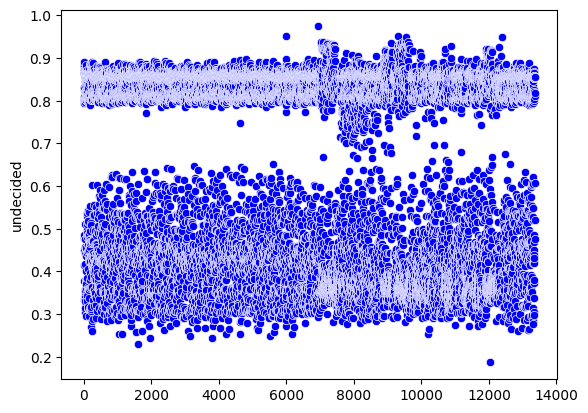

In [11]:
sns.scatterplot(data=df.to_pandas()["undecided"], color="blue")

<Axes: ylabel='malicious'>

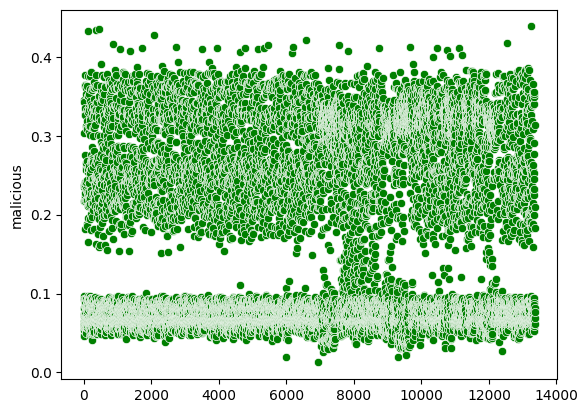

In [12]:
sns.scatterplot(data=df.to_pandas()["malicious"], color="green")

<Axes: ylabel='benign'>

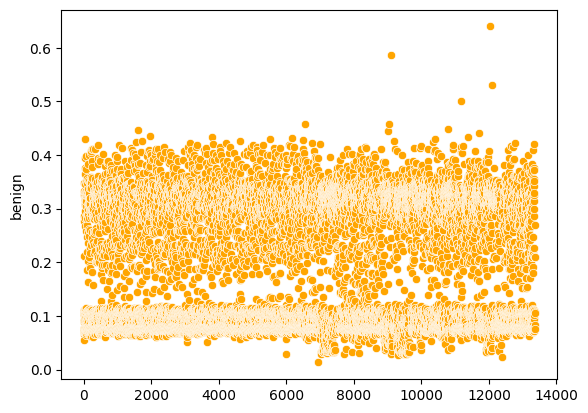

In [13]:
sns.scatterplot(data=df.to_pandas()["benign"], color="orange")

In [17]:
df["output"].value_counts()

output,count
str,u32
"""malicious""",573
"""benign""",650
"""undecided""",12136


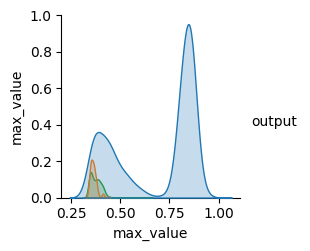

In [18]:
sns.pairplot(data=df.select("output", "max_value").to_pandas(), hue="output")

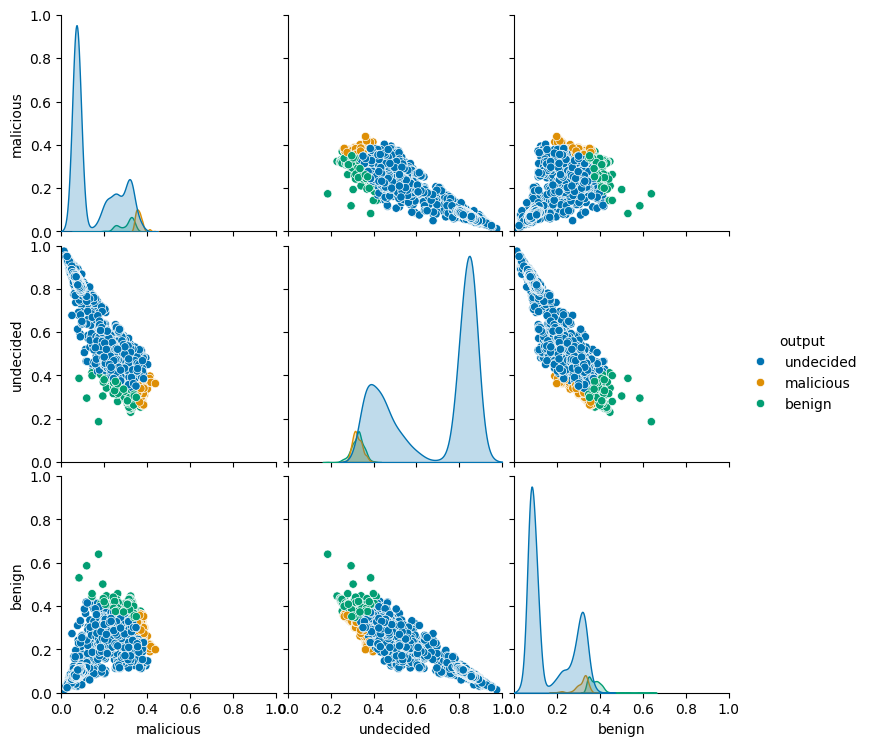

In [19]:
sns_big_pairplot = sns.pairplot(
	data=df.select("malicious", "undecided", "benign", "output").to_pandas(), 
	hue="output", 
	diag_kind="kde", 
	palette=sns.color_palette("colorblind", n_colors=3))
sns_big_pairplot.set(xlim=(0,1), ylim=(0, 1))
print(sns_big_pairplot)

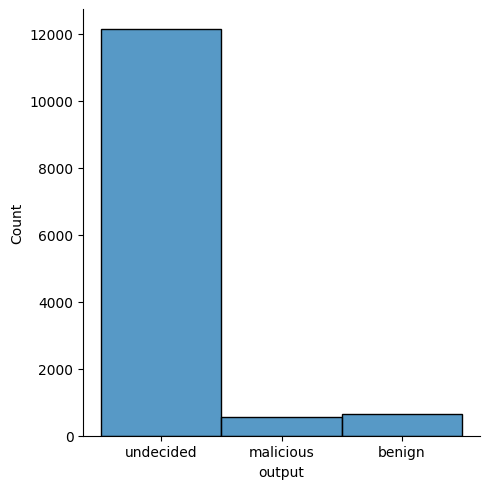

In [20]:
sns.displot(data=df["output"].to_pandas(), discrete=True)

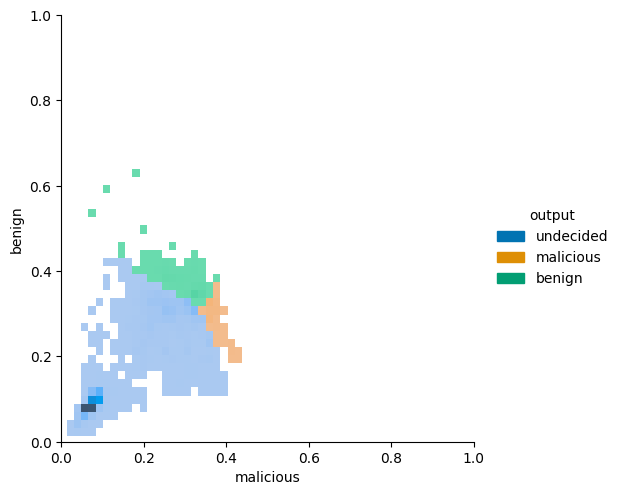

In [21]:
sns_plot = sns.displot(
    data=df.select("malicious", "benign", "output").to_pandas(),
    x="malicious",
    y="benign",
	hue="output",
	palette=sns.color_palette("colorblind", n_colors=3)
)
sns_plot.set(ylim=(0,1), xlim=(0,1))
print(sns_plot)

In [27]:
df.filter(pl.col("output") == "benign")["sequence"][0]

'{"kind":"Event","apiVersion":"audit.k8s.io/v1","level":"RequestResponse","auditID":"bce0f699-de1d-4f94-98a0-aeddd1d33505","stage":"ResponseComplete","requestURI":"/apis/coordination.k8s.io/v1/namespaces/kube-system/leases/kube-scheduler?timeout=5s","verb":"update","user":{"username":"system:kube-scheduler","groups":["system:authenticated"]},"sourceIPs":["192.168.38.9"],"userAgent":"kube-scheduler/v1.28.7 (linux/amd64) kubernetes/c8dcb00/leader-election","objectRef":{"resource":"leases","namespace":"kube-system","name":"kube-scheduler","uid":"76cad05e-fbec-4503-88ab-21e9ec9d38fa","apiGroup":"coordination.k8s.io","apiVersion":"v1","resourceVersion":"5336620"},"responseStatus":{"metadata":{},"code":200},"requestObject":{"kind":"Lease","apiVersion":"coordination.k8s.io/v1","metadata":{"name":"kube-scheduler","namespace":"kube-system","uid":"76cad05e-fbec-4503-88ab-21e9ec9d38fa","resourceVersion":"5336620","creationTimestamp":"2024-02-19T08:50:48Z","managedFields":[{"manager":"kube-schedul

In [29]:
df.filter(pl.col("output") == "malicious")["sequence"][1]

'{"kind":"Event","apiVersion":"audit.k8s.io/v1","level":"RequestResponse","auditID":"98c6f16b-06d1-4406-988d-f0e3e25aa056","stage":"ResponseComplete","requestURI":"/apis/coordination.k8s.io/v1/namespaces/kube-system/leases/apiserver-adpx6exqq66lc64z7ri5spi2yq","verb":"update","user":{"username":"system:apiserver","uid":"788054ee-25c2-4bc5-b31e-b88f18969435","groups":["system:masters"]},"sourceIPs":["::1"],"userAgent":"kube-apiserver/v1.28.7 (linux/amd64) kubernetes/c8dcb00","objectRef":{"resource":"leases","namespace":"kube-system","name":"apiserver-adpx6exqq66lc64z7ri5spi2yq","uid":"8d923080-040e-46e2-8a07-924831e68898","apiGroup":"coordination.k8s.io","apiVersion":"v1","resourceVersion":"5336608"},"responseStatus":{"metadata":{},"code":200},"requestObject":{"kind":"Lease","apiVersion":"coordination.k8s.io/v1","metadata":{"name":"apiserver-adpx6exqq66lc64z7ri5spi2yq","namespace":"kube-system","uid":"8d923080-040e-46e2-8a07-924831e68898","resourceVersion":"5336608","creationTimestamp":